<a href="https://colab.research.google.com/github/anngeorge12/AFS/blob/main/Copy_of_Working_87_changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyshark
!apt-get install tshark
!pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.9 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13
  wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader geoipupdate geoip-database geoip-database-extra libjs-leaflet
  libjs-leaflet.markercluster wireshark-doc
The following NEW packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark15 libwiretap12 libwsutil13 tshark
  wireshark-common
0 upgraded, 16 newly installed, 0 to remove and 49 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 120 MB of additional disk space wil

In [ ]:
import numpy as np
import pandas as pd
import joblib
import sklearn as sk
import matplotlib.pyplot as plt
import scapy
import pyshark




In [ ]:
print(sk.__version__)

1.5.2


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/phishing_legitimate(adult_filled).csv')

In [ ]:
#testing
# Check the first few rows
print(df.head())
# Check for null values
print(df.isnull().sum())

# Display the columns in the dataset
print(df.columns)

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['url'])
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
# Convert all attack types to 'Malicious' and label Benign as 0, Malicious as 1
df['status'] = df['status'].apply(lambda x: 0 if x == 'legitimate' else 1)

In [ ]:
# Check the distribution of labels
print(df['status'].value_counts())
# Fill missing numerical values with the mean of the respective column
#df = df.fillna(df.mean())

# Verify that no missing values remain
print(df.isnull().sum())
#----------------------------------------------------------------------------------------#


status
1    5835
0    5715
Name: count, dtype: int64
url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [ ]:
#---------------Standardisation and Normalisation of the Features----------------------#

from sklearn.preprocessing import StandardScaler

# Step 1: Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Fill NaN values with the mean of the respective column
#df.fillna(df.mean(), inplace=True)

# Step 3: Check that no infinite or NaN values remain
#print(np.isinf(df).sum())  # Should print 0 for all columns
#print(df.isnull().sum())   # Should print 0 for all columns

feature_columns = [
    'length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
]

# Step 4: Split features and labels
X = df[feature_columns]

y = df['status']

# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Save the scaler
joblib.dump(scaler, 'scalernew.pkl')

['scalernew.pkl']

In [ ]:
# Check the scaled feature values
print(X_scaled[:5])  # Display the first 5 rows of scaled data
#---------------------------------------------------------------------#
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)

[[-0.42977295 -0.18615967 -0.41844248  0.39003144 -0.38514579 -0.29202246
  -0.67090582  1.10940112 -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.19677282 -0.19371001 -0.38664282]
 [ 0.29538355  0.18561248  2.38981472 -1.06903355 -0.38514579 -0.29202246
   0.38914373 -0.8852413   1.88737029 -0.26722029 -0.22847331 -0.50054107
   0.75863198  0.93762756 -0.38664282]
 [ 1.18370027  2.69507447  2.38981472  1.11956394  2.371009    2.72754727
   0.38914373 -0.8852413   1.10171029 -0.26722029  4.3768788   1.99783807
   0.07619998  0.28493281 -0.38664282]
 [-0.77422229 -0.92970397 -0.41844248 -0.33950105 -0.38514579 -0.29202246
  -1.2009306  -0.8852413  -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.46974562 -0.45478791 -0.38664282]
 [-0.10345252 -0.55793182 -0.41844248 -0.33950105 -0.38514579 -0.29202246
   0.38914373  1.10940112 -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.19677282  0.02385491 -0.38664282]]
(8085, 15) (3465, 15)


In [ ]:
#=-----------------------------------------------------------#
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to get feature importance
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Get the importance of each feature
feature_importances = clf.feature_importances_

# Create a DataFrame of feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})



In [ ]:
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df)

              Feature  Importance
7              nb_www    0.152787
0          length_url    0.125961
12  longest_words_raw    0.105119
13  longest_word_path    0.103324
1     length_hostname    0.103267
14        phish_hints    0.086524
8    ratio_digits_url    0.081585
6            nb_slash    0.062441
3             nb_dots    0.062338
9   ratio_digits_host    0.039438
2                  ip    0.021700
4               nb_qm    0.018785
5               nb_eq    0.017504
11      prefix_suffix    0.015873
10   tld_in_subdomain    0.003355


In [ ]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # visualisation

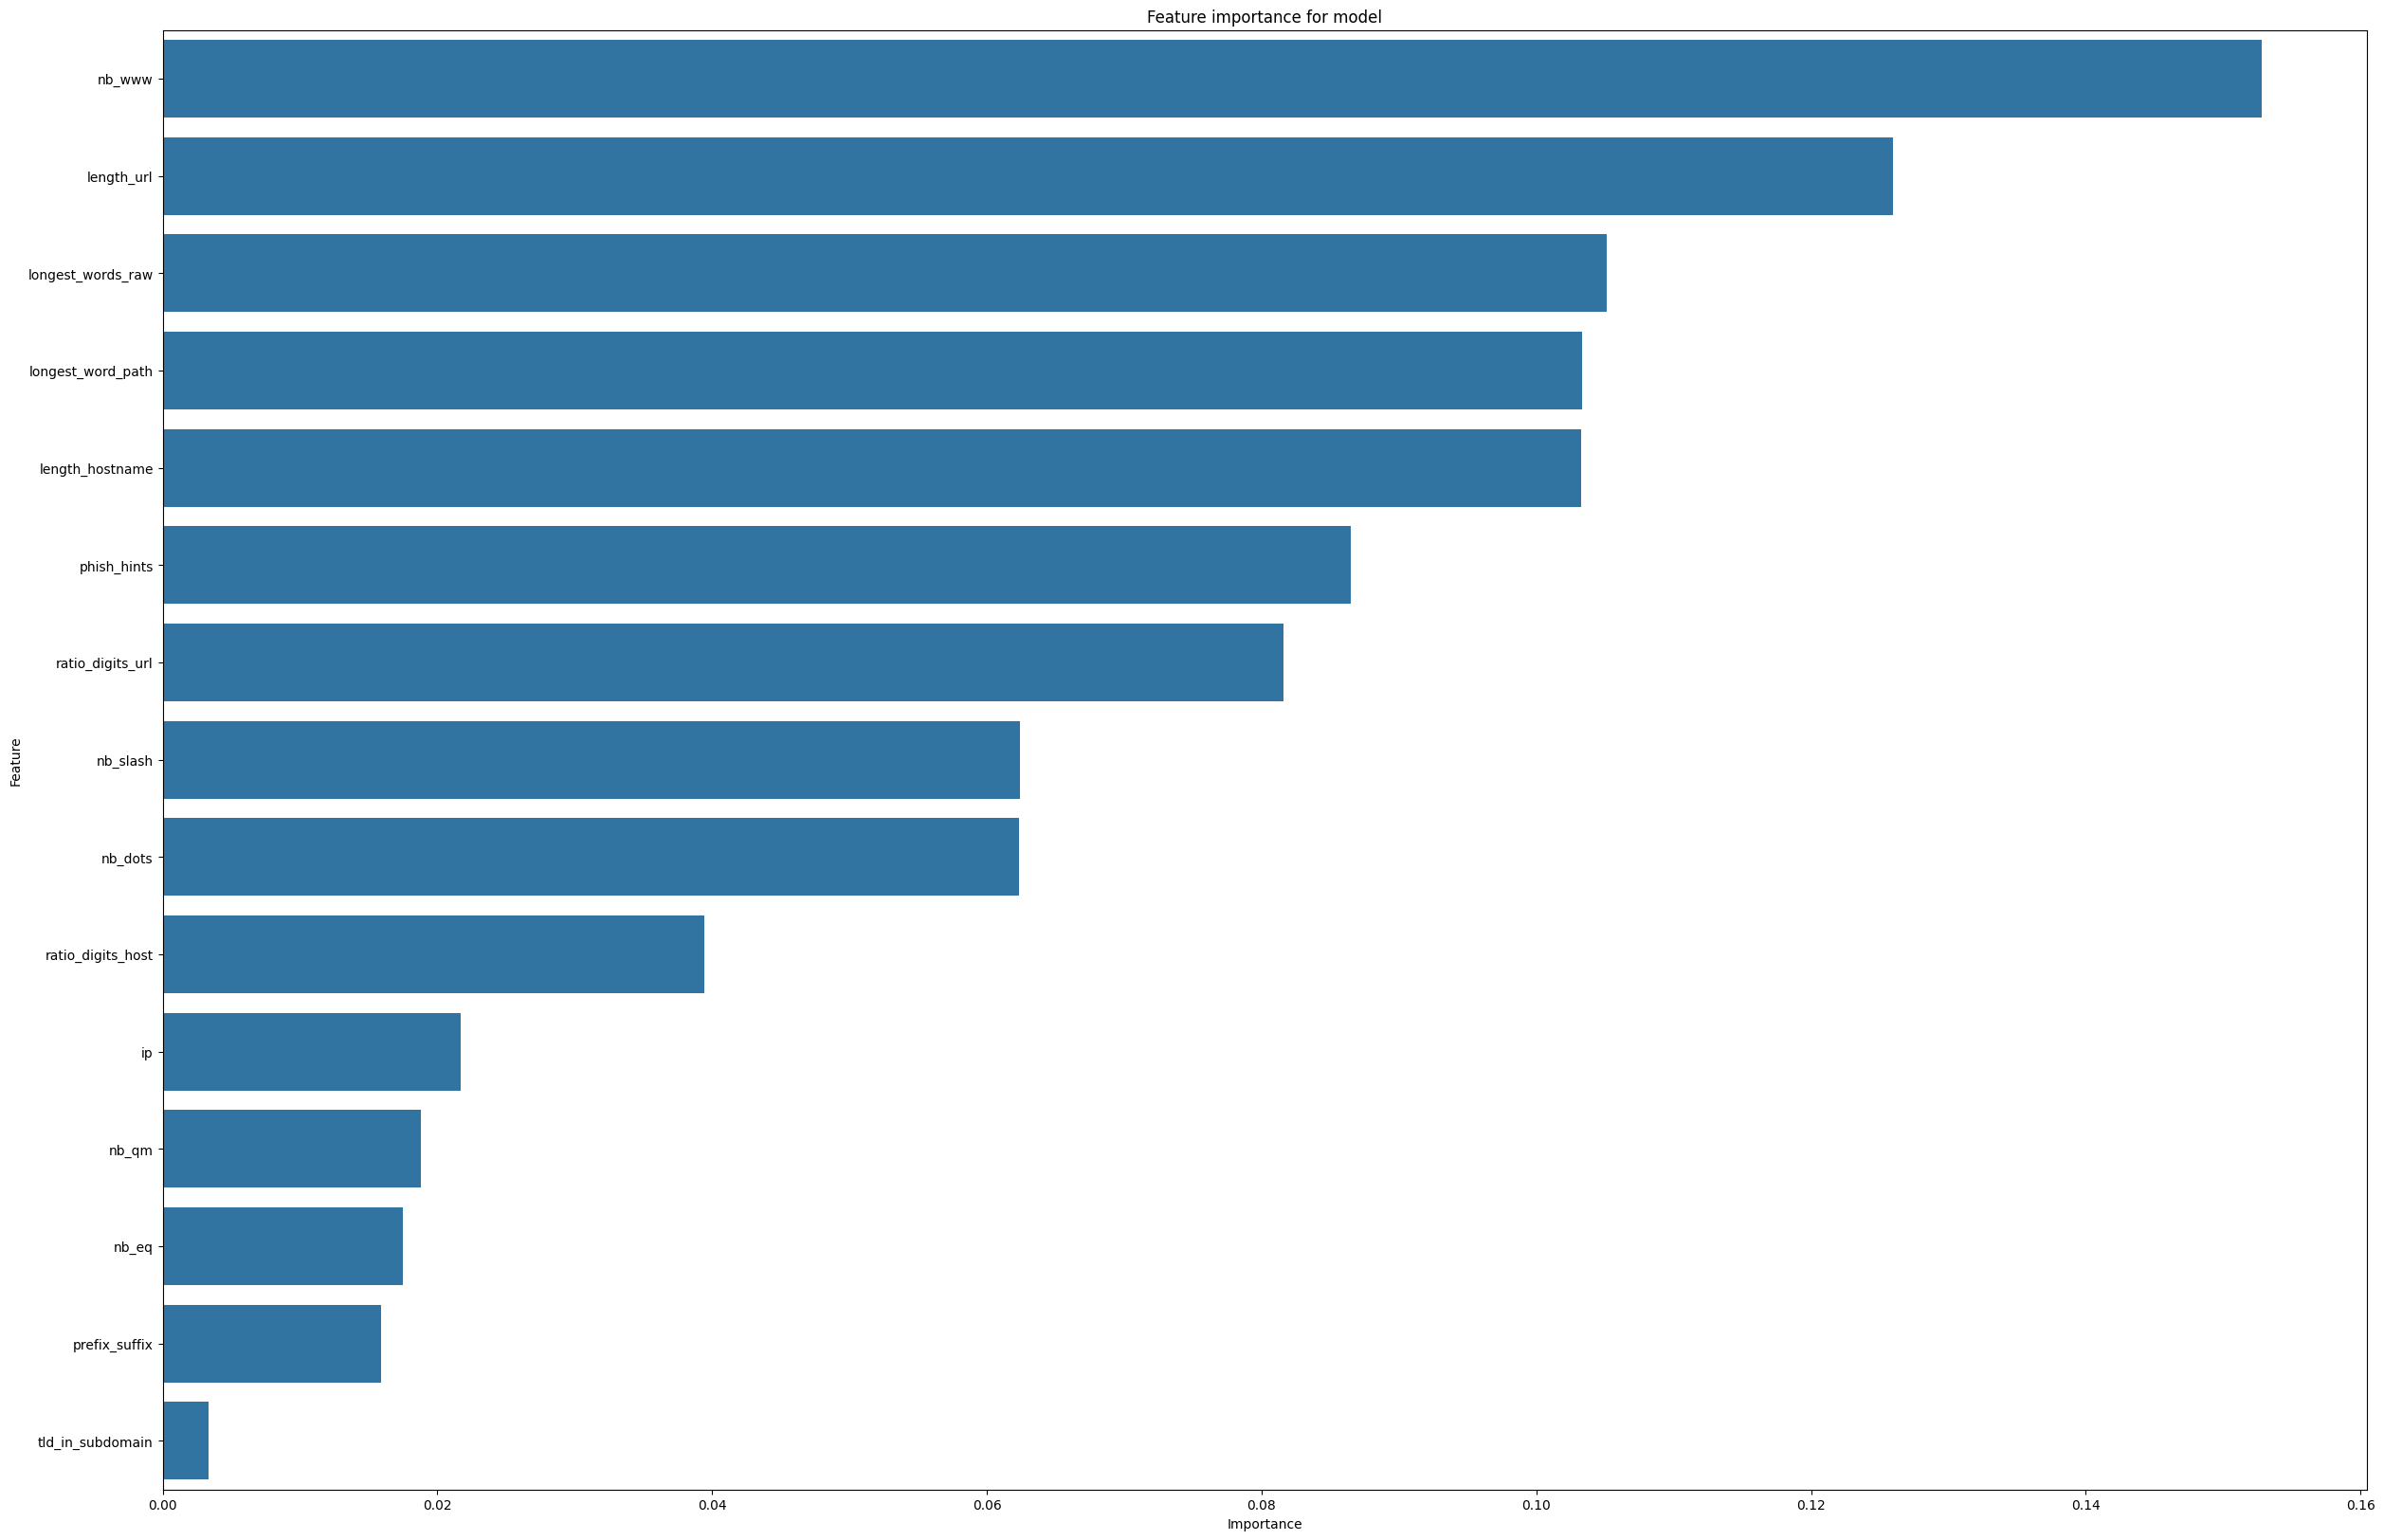

In [ ]:
#feature_imp = pd.Series(CV.best_estimator_.feature_importances_,index=CV.best_estimator_.feature_names_in_).sort_values(ascending=False)
f,ax = plt.subplots(figsize=(30,20))

# Use the 'Importance' column for the x-axis and 'Feature' for the y-axis
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:50]) # Corrected this line to specify x and y columns

ax.set_title('Feature importance for model')
plt.show()

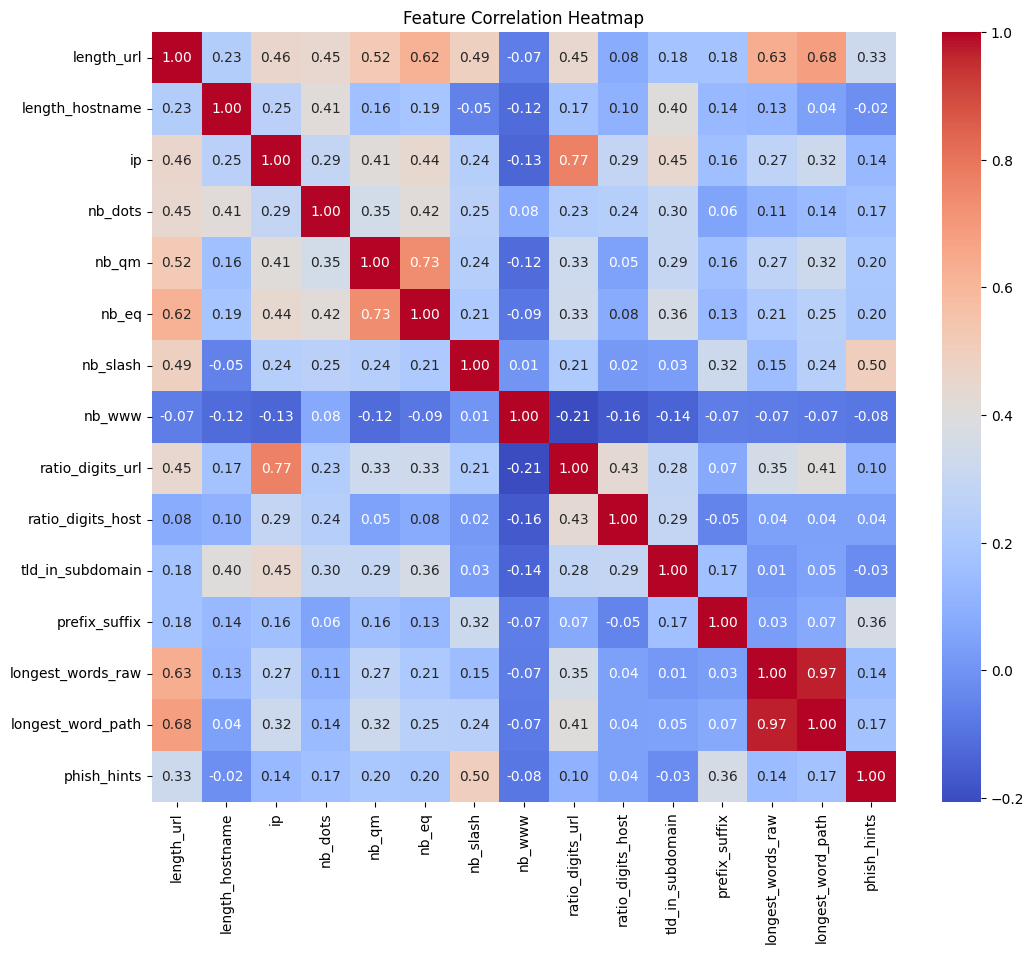

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'preprocessed_data' is your DataFrame with scaled features and labels
# If not, replace it with your actual DataFrame name
correlation_matrix = df[feature_columns].corr()  # Calculate correlation

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#---Accuracy Check---------#
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred = clf.predict(X_test)

# Step 4: Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.94%
Accuracy: 87.94%


In [ ]:
#Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision * 100:.2f}%")

Precision: 88.39%


In [ ]:
#recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall * 100:.2f}%")

Recall: 87.48%


In [ ]:
#f1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1 * 100:.2f}%")

F1 Score: 87.93%


In [ ]:
#false positive rate
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision * 100:.2f}%")

Precision: 88.39%


In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1524  200]
 [ 218 1523]]


<Axes: >

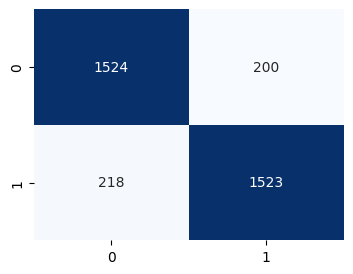

In [ ]:
#visualisation of confusion matrix for detection of phishing and legitimate websites

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'conf_matrix' is your confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

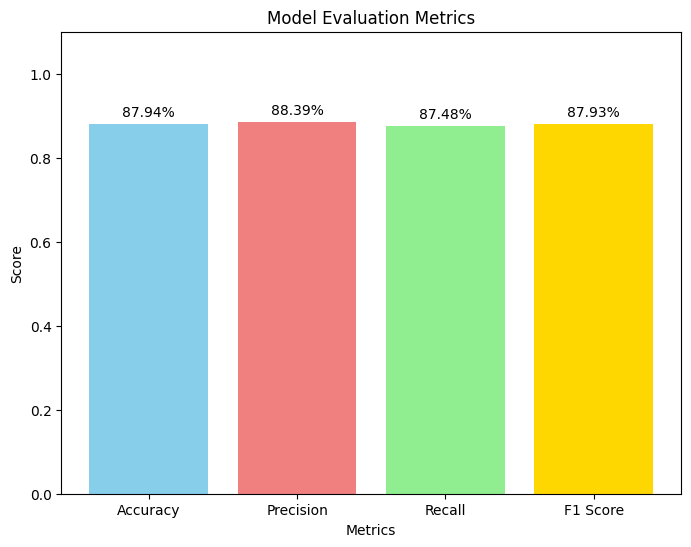

In [ ]:
# prompt: give me a code to display a bar chart which compares the accuracy score,precision,recall and f1 score

import matplotlib.pyplot as plt

# Sample data (replace with your actual scores)
scores = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

metrics = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1.1)  # Set y-axis limit to 0-1 for better visualization

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', fontsize=10)


plt.show()

In [ ]:
#-----------loading the created model-----------#
joblib.dump(clf, '/content/drive/MyDrive/firewall_model_new.pkl')

# Save the preprocessed dataset
preprocessed_data = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)
preprocessed_data.to_csv('/content/drive/MyDrive/preprocessed_phishing_new.csv', index=False)

# Check the saved file
print(preprocessed_data.head())




   length_url  length_hostname        ip   nb_dots     nb_qm     nb_eq  \
0   -0.429773        -0.186160 -0.418442  0.390031 -0.385146 -0.292022   
1    0.295384         0.185612  2.389815 -1.069034 -0.385146 -0.292022   
2    1.183700         2.695074  2.389815  1.119564  2.371009  2.727547   
3   -0.774222        -0.929704 -0.418442 -0.339501 -0.385146 -0.292022   
4   -0.103453        -0.557932 -0.418442 -0.339501 -0.385146 -0.292022   

   nb_slash    nb_www  ratio_digits_url  ratio_digits_host  tld_in_subdomain  \
0 -0.670906  1.109401         -0.591104           -0.26722         -0.228473   
1  0.389144 -0.885241          1.887370           -0.26722         -0.228473   
2  0.389144 -0.885241          1.101710           -0.26722          4.376879   
3 -1.200931 -0.885241         -0.591104           -0.26722         -0.228473   
4  0.389144  1.109401         -0.591104           -0.26722         -0.228473   

   prefix_suffix  longest_words_raw  longest_word_path  phish_hints  statu

In [ ]:
#-----------loading the created model-----------#
joblib.dump(clf, 'firewall_model_new.pkl')
model=joblib.load('/content/drive/MyDrive/firewall_model_new.pkl')
modeltest=model.predict(X_test)
print(accuracy_score(y_test,modeltest)*100)
#modeltest

87.93650793650794


'length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank'

In [ ]:
!pip install tldextract


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tldextract
from urllib.parse import urlparse
import re
import socket
from bs4 import BeautifulSoup
import requests

def extract_features(url):
    # Parse the URL to get netloc (hostname), path, etc.
    parsed_url = urlparse(url)
    hostname = parsed_url.netloc  # netloc contains the hostname and port if present
    features = {}

    # URL length
    features['length_url'] = len(url)

    # Parse URL
    parsed_url = urlparse(url)

    # Hostname length
    features['length_hostname'] = len(parsed_url.hostname) if parsed_url.hostname else 0

    # Extract IP address
    try:
        features['ip'] = 0 if socket.gethostbyname(parsed_url.hostname) else 1
    except Exception:
        features['ip'] = None

    # Number of dots
    features['nb_dots'] = url.count('.')

    # Number of question marks
    features['nb_qm'] = url.count('?')

    # Number of equal signs
    features['nb_eq'] = url.count('=')

    # Number of slashes
    features['nb_slash'] = url.count('/')

    # Number of 'www'
    features['nb_www'] = url.count('www')

    # Ratio of digits in URL
    features['ratio_digits_url'] = sum(c.isdigit() for c in url) / len(url) if url else 0

    # Ratio of digits in hostname
    features['ratio_digits_host'] = sum(c.isdigit() for c in parsed_url.hostname) / len(parsed_url.hostname) if parsed_url.hostname else 0

    # TLD in subdomain
    extracted = tldextract.extract(url)
    features['tld_in_subdomain'] = 1 if extracted.subdomain and extracted.suffix in extracted.subdomain else 0

    # Prefix and suffix
    features['prefix_suffix'] = 1 if re.match(r'^(www|mail|ftp)', extracted.subdomain) else 0 if extracted.subdomain else 0

     # Split the hostname by dots
    hostname_words = hostname.split('.')
    #features['shortest_word_host'] = min((len(word) for word in hostname_words), default=0)


    # Longest word in URL (excluding path)
    features['longest_words_raw'] = longest_word_host = max((len(word) for word in hostname_words), default=0)

    # Longest word in path
    path_words = parsed_url.path.split('/')
    features['longest_word_path'] = max((len(word) for word in path_words if word), default=0)

    # Phishing hints (basic example)
    phishing_keywords = ['secure', 'account', 'verify', 'update', 'confirm', 'login', 'signin']
    features['phish_hints'] = 1 if any(keyword in url for keyword in phishing_keywords) else 0


    return features

# Example usage
url = "https://www.annabelle.com.cy"
def predict_url(url):
    features = extract_features(url)
    features_list = [
    features['length_url'],
    features['length_hostname'],
    features['ip'],
    features['nb_dots'],
    features['nb_qm'],
    features['nb_eq'],
    features['nb_slash'],
    features['nb_www'],
    features['ratio_digits_url'],
    features['ratio_digits_host'],
    features['tld_in_subdomain'],
    features['prefix_suffix'],
    features['longest_words_raw'],
    features['longest_word_path'],
    features['phish_hints'],
]
    features_df = pd.DataFrame([features_list], columns=features.keys())
    scaler = joblib.load('/content/scalernew.pkl')
    features_scaled = scaler.transform(features_df)
    print(features_scaled)
    prediction = model.predict(features_scaled)
    return "Phishing" if prediction[0] == 1 else "Legitimate"

print(predict_url(url))



[[-0.59293316 -0.09321664 -0.41844248  0.39003144 -0.38514579 -0.29202246
  -1.2009306   1.10940112 -0.59110353 -0.26722029 -0.22847331  1.99783807
  -0.28776375 -0.45478791 -0.38664282]]
Legitimate


In [ ]:
print(predict_url("https://hentaimama.io"))

[[-0.71983555 -0.74381789 -0.41844248 -1.06903355 -0.38514579 -0.29202246
  -1.2009306  -0.8852413  -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.24226828 -0.45478791 -0.38664282]]
Phishing


In [ ]:
print(predict_url("https://exoticads.com"))

[[-0.71983555 -0.74381789 -0.41844248 -1.06903355 -0.38514579 -0.29202246
  -1.2009306  -0.8852413  -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.28776375 -0.45478791 -0.38664282]]
Phishing


In [ ]:
print(predict_url("https://xhamster.com"))

[[-0.73796446 -0.83676093 -0.41844248 -1.06903355 -0.38514579 -0.29202246
  -1.2009306  -0.8852413  -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.33325922 -0.45478791 -0.38664282]]
Phishing


In [ ]:
print(predict_url("http://slism.com/girlstalk/passive-aggressive-behavior.html"))

[[-0.03093687 -1.11559004 -0.41844248 -0.33950105 -0.38514579 -0.29202246
  -0.14088104 -0.8852413  -0.59110353 -0.26722029 -0.22847331 -0.50054107
  -0.46974562  0.93762756 -0.38664282]]
Legitimate


In [ ]:
print(predict_url("https://www.google.com/search?q=sopa2day&rlz=1C1CHZN_enIN974IN974&oq=sopa2day&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIPCAEQABgKGIMBGLEDGIAEMgwIAhAAGAoYsQMYgAQyDAgDEAAYChixAxiABDIPCAQQABgKGIMBGLEDGIAEMg8IBRAAGAoYgwEYsQMYgAQyDwgGEAAYChiDARixAxiABDIGCAcQRRg80gEINDIwOWowajSoAgCwAgA&sourceid=chrome&ie=UTF-8"))

[[ 4.22935759 -0.65087486 -0.41844248 -0.33950105  2.371009    5.747117
  -0.67090582  1.10940112 -0.05653075 -0.26722029 -0.22847331  1.99783807
  -0.42425015 -0.19371001 -0.38664282]]
Legitimate


In [ ]:
print(sklearn.__version__)

NameError: name 'sklearn' is not defined